In [109]:
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

img = cv2.imread('2.jpg')

img = cv2.resize(img, (640, 480))

(rects, _) = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.05)

for (x, y, w, h) in rects:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the output image
cv2.imshow("Pedestrian Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# people detector using hog and svm classifier from inbuilt functions
https://docs.opencv.org/4.x/d5/d33/structcv_1_1HOGDescriptor.html

extract umbrellas from dataset

['-0__-_-_-_jpg.rf.8cce0352e7888a5e1768b1602864069a.jpg', '-120-_-_jpg.rf.73ac1130ba6d4d15866eb87ed85db93b.jpg', '-Consumertimes-_jpg.rf.0dee129a860de1d0f3fc1b3ba6565c6a.jpg', '-jpg-2-_jpg.rf.149c63c29f77d252172e695ee5710752.jpg', '-jpg-_-4-_jpg.rf.8bc255f0af92b3c1f1503f4b1abff050.jpg', '-quot_-quot_-20-_jpg.rf.5b0edb40f260b3a84f444fa1d33fee7c.jpg', '-_-1-692g-_-_jpg.rf.dda6a179d9ab4637f0e4d575a882ae98.jpg', '-_-1-_jpg.rf.05198c59e626f8c80a3521d9ad93eccf.jpg', '-_-5-__yy_jpg.rf.d3a0b29a965de2e6cc799a948acd732c.jpg', '-_-9_17-__-_jpg.rf.89b69e65e9f1d0d6e69039a386126db0.jpg', '-_-GTA-_jpg.rf.a2ae6b6cf9d13cf0a148fead30ae2cf2.jpg', '-_-rereco_jpg.rf.19aec47f1df9b7236d4234a3c88404bf.jpg', '-_-_-19-_jpg.rf.2783a483db871391b7bb1feeb472d9e6.jpg', '-_-_-_-_-Save-Internet-_jpg.rf.f35025c629bb0b48f95a153f0a66259f.jpg', '-_-_-_-_jpg.rf.8dd3745aef8564eb084045576456bc81.jpg', '-_-_-_-_jpg.rf.928af90a14047238005f0bfdf4457adf.jpg', '-_-_-_-_yythkg_jpg.rf.f6f3af3782b0767ac5c8431be894daaa.jpg', '-_-_-_-

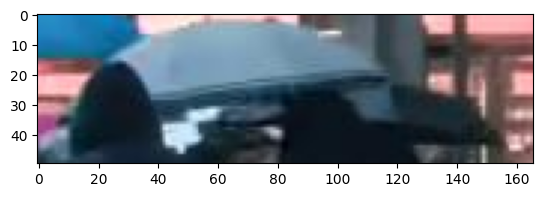

In [3]:
import cv2
import os

train_folder = 'umbr/train/images/'
labels_folder = 'umbr/train/labels/'
output_folder = 'umbr/output/'

os.makedirs(output_folder, exist_ok=True)

image_files = [f for f in os.listdir(train_folder) if f.endswith('.jpg')]
print(image_files)

for img_file in image_files:
    label_file = os.path.join(labels_folder, img_file.replace('.jpg', '.txt'))
   
    img_path = os.path.join(train_folder, img_file)
    image = cv2.imread(img_path)

    if image is None:
        print(f'Image {img_path} not found!')
        continue

    img_height, img_width, _ = image.shape

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue  
            class_index = int(parts[0])  
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            x_min = int((x_center - width / 2) * img_width)
            y_min = int((y_center - height / 2) * img_height)
            x_max = int((x_center + width / 2) * img_width)
            y_max = int((y_center + height / 2) * img_height)

            x_min = max(0, x_min)
            y_min = max(0, y_min)
            x_max = min(img_width, x_max)
            y_max = min(img_height, y_max)

            cropped_image = image[y_min:y_max, x_min:x_max]
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

            output_path = os.path.join(output_folder, f'{img_file.replace(".jpg", "")}_cropped_{class_index}.jpg')
            cv2.imwrite(output_path, cropped_image)

        print(f'Cropped images for {img_file} saved to the output folder.')
    else:
        print(f'Label file {label_file} not found!')

print("All cropping completed.")





In [110]:
import cv2
from skimage.feature import hog
import numpy as np

img = cv2.imread('umbr/output/-__jpg.rf.b56ecfd50a02fb4279e77e782cf3fc01_cropped_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True, feature_vector=True)

cv2.imshow("HOG Image", hog_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


extract hog features

In [111]:
import cv2
import numpy as np
import os
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

image_folder = 'umbr/output'

features_listx1 = []
labels_listx1 = []

resize_dim = (128, 128)  

for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, resize_dim)  
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        hog_features, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True, feature_vector=True)
        
        features_listx1.append(hog_features)
        labels_listx1.append(1)  


In [112]:
import cv2
import numpy as np
import os
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

image_folder = 'ped/train/images'

features_listx2 = []
labels_listx2 = []

resize_dim = (128, 128) 

for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, resize_dim)  
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Extract HOG features
        hog_features, _ = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True, feature_vector=True)
        
        features_listx2.append(hog_features)
        labels_listx2.append(0)  


train svm classifier


In [113]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = features_listx1 + features_listx2
y = labels_listx1 + labels_listx2
print(len(features_listx1[0]))
print(len(features_listx2[0]))
print(len(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

# Test the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


8100
8100
114
Accuracy: 95.65%


In [114]:
out=clf.predict(X_test)
out

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1])

In [115]:
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

def detect_umbrella(image, clf, window_size=(128, 128), step_size=16):
    # Resize the image to multiple scales for multi-scale detection
    
    for scale in np.linspace(0.5, 1.5, num=10):
        resized_image = cv2.resize(image, (int(image.shape[1] * scale), int(image.shape[0] * scale)))
        for (x, y, window) in sliding_window(resized_image, step_size, window_size):
            # if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
            #     continue

            # Extract HOG features from the window
            gray_window = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
            # print(gray_window.shape)
            if gray_window.shape!=(128,128):
                continue
            features = hog(gray_window, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)

            # Use the trained SVM to classify the window
            prediction = clf.predict([features])
            if prediction == 1:
                # Draw a rectangle around the detected umbrella
                cv2.rectangle(image, (int(x / scale), int(y / scale)),
                              (int((x + window_size[0]) / scale), int((y + window_size[1]) / scale)),
                              (0, 255, 0), 2)

                return image, prediction
            
    return 0,0

test_image = cv2.imread('umb1.jpg')

img_out, detected_out = detect_umbrella(test_image, clf)
print(detected_out)
cv2.imshow("Detected Umbrellas", img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


[1]


sliding window based multiscales checker

In [25]:
import cv2
import numpy as np
from skimage.feature import hog

# Sliding window function
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Non-Maximum Suppression (NMS) function
def non_max_suppression(boxes, scores, iou_threshold=0.5):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    scores = np.array(scores)

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    sorted_indices = np.argsort(scores)[::-1]

    picked_boxes = []
    while len(sorted_indices) > 0:
        current = sorted_indices[0]
        picked_boxes.append(current)

        xx1 = np.maximum(x1[current], x1[sorted_indices[1:]])
        yy1 = np.maximum(y1[current], y1[sorted_indices[1:]])
        xx2 = np.minimum(x2[current], x2[sorted_indices[1:]])
        yy2 = np.minimum(y2[current], y2[sorted_indices[1:]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / areas[sorted_indices[1:]]

        sorted_indices = sorted_indices[np.where(overlap <= iou_threshold)[0] + 1]

    return picked_boxes

# Pedestrian detection function with custom SVM and HOG
def detect_pedestrians(image, clf, window_size=(128, 128), step_size=8, iou_threshold=0.5):
    detected_boxes = []
    scores = []
    
    for scale in np.linspace(0.5, 1.5, num=10):  # Adjust scaling factor
        resized_image = cv2.resize(image, (int(image.shape[1] * scale), int(image.shape[0] * scale)))

        for (x, y, window) in sliding_window(resized_image, step_size, window_size):
            if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
                continue

            # Extract HOG features from the window
            gray_window = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
            features = hog(gray_window, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)

            # Use the trained SVM to classify the window
            prediction = clf.predict([features])

            if prediction == 1:
                # Scale back the coordinates to the original image size
                x_original = int(x / scale)
                y_original = int(y / scale)
                w_original = int(window_size[0] / scale)
                h_original = int(window_size[1] / scale)

                # Append the bounding box and score
                detected_boxes.append([x_original, y_original, x_original + w_original, y_original + h_original])
                scores.append(clf.decision_function([features]))  # Get confidence score

    # Apply Non-Maximum Suppression
    picked_indices = non_max_suppression(detected_boxes, scores, iou_threshold)

    for i in picked_indices:
        i=int(i)
        (x1, y1, x2, y2) = detected_boxes[i]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return image

# Load the image
img = cv2.imread('umb1.jpg')

img = cv2.resize(img, (640, 480))

detected_image = detect_pedestrians(img, clf)

cv2.imshow("Pedestrian Detection", detected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


/tmp/ipykernel_214028/2596393942.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i=int(i)


added non max supressiong

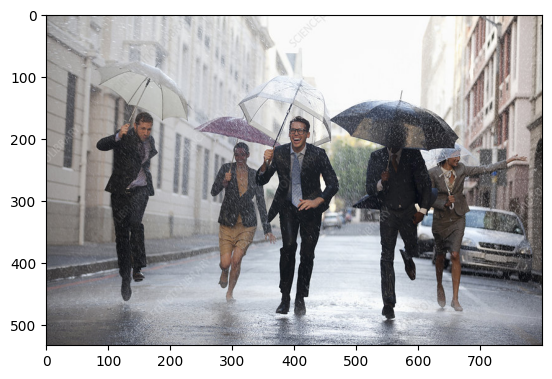

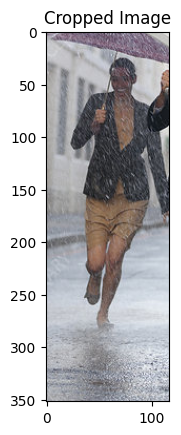

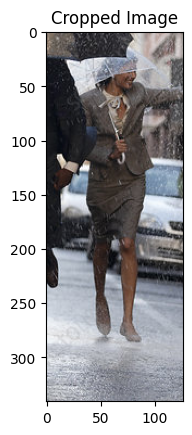

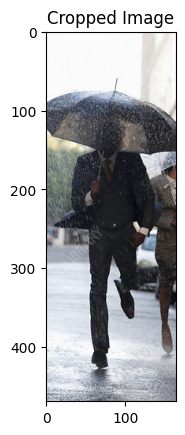

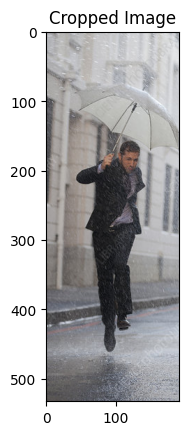

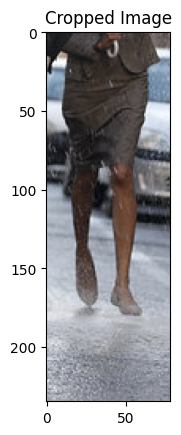

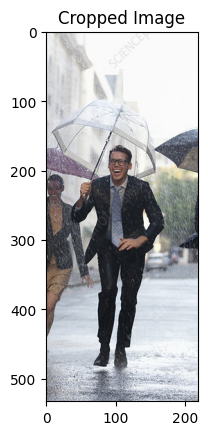

pred:[1]


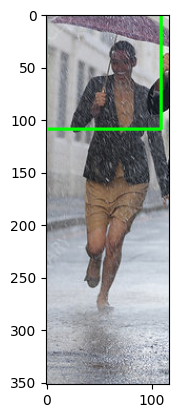

pred:[1]


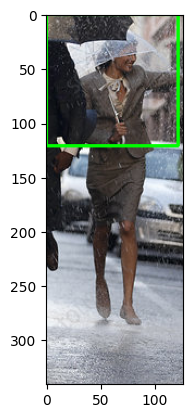

pred:[1]


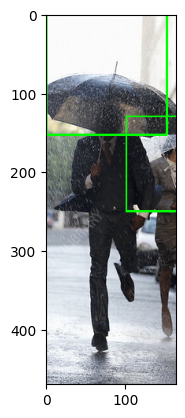

pred:[1]


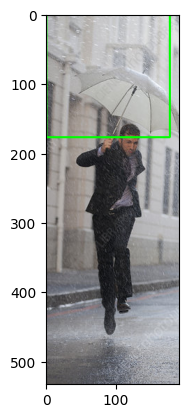

pred:[1]


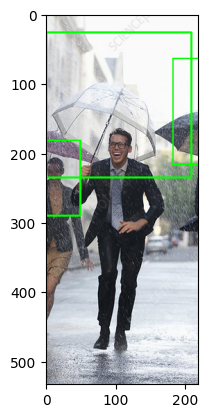

In [122]:
import cv2
import numpy
import matplotlib.pyplot as plt

hog_ped = cv2.HOGDescriptor()
hog_ped.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

img = cv2.imread('umb.jpg')

# img = cv2.resize(img, (640, 480))

(rects, weights) = hog_ped.detectMultiScale(img, winStride=(8, 8), padding=(4, 4), scale=1.05)

# for (x, y, w, h) in rects:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

images =[]

for (x, y, w, h) in rects:
    p,q=int(0.01*w),int(0.3*h)
    x1, y1 = max(x - p, 0), max(y - q, 0)
    x2, y2 = min(x + w + p, img.shape[1]), min(y + h + q, img.shape[0])
    
    # Ensure the cropped area is valid
    if x2 > x1 and y2 > y1:
        img_temp = img[y1:y2, x1:x2]
        images.append(img_temp)
        plt.imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Image")
        plt.show()

for img in images:
    # print(detect_umbrella(img, clf))
    img_umb, pred = detect_umbrella(img, clf)
    if type(img_umb) != int:
        print(f"pred:{pred}")
        plt.imshow(cv2.cvtColor(img_umb, cv2.COLOR_BGR2RGB))
        plt.show()

# cv2.imshow("Pedestrian Detection", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


detect pedestrian first then detect umbrellas around

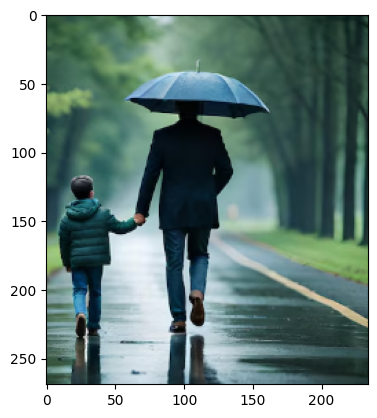

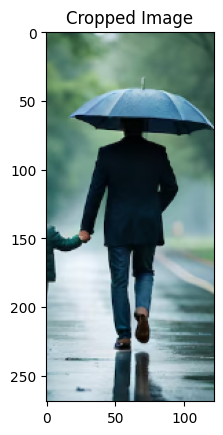

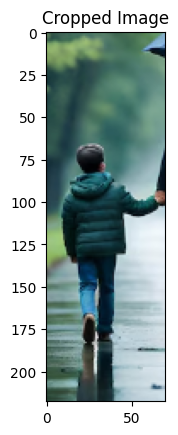

pred:[1]


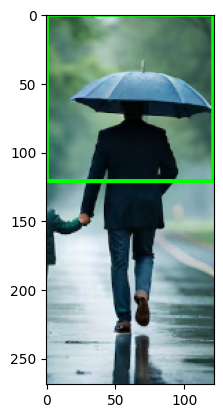

In [120]:

import cv2
import numpy
import matplotlib.pyplot as plt

hog_ped = cv2.HOGDescriptor()
hog_ped.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

img = cv2.imread('3.png')

# img = cv2.resize(img, (640, 480))

(rects, weights) = hog_ped.detectMultiScale(img, winStride=(8, 8), padding=(4, 4), scale=1.05)

# for (x, y, w, h) in rects:
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

images =[]

for (x, y, w, h) in rects:
    p,q=int(0.01*w),int(0.3*h)
    x1, y1 = max(x - p, 0), max(y - q, 0)
    x2, y2 = min(x + w + p, img.shape[1]), min(y + h + q, img.shape[0])
    
    # Ensure the cropped area is valid
    if x2 > x1 and y2 > y1:
        img_temp = img[y1:y2, x1:x2]
        images.append(img_temp)
        plt.imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))
        plt.title("pedestrian")
        plt.show()

for img in images:
    # print(detect_umbrella(img, clf))
    img_umb, pred = detect_umbrella(img, clf)
    if type(img_umb) != int:
        print(f"pred:{pred}")
        plt.imshow(cv2.cvtColor(img_umb, cv2.COLOR_BGR2RGB))
        plt.show()

# cv2.imshow("Pedestrian Detection", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


the people detected and the corressponding umbrellas are shown 